In [1]:
import numpy as np
import cv2
import skimage
from skimage import io
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.morphology import reconstruction
from scipy import stats
from statistics import mean 

In [2]:
img = cv2.imread('sem_1.jpg',0)

In [3]:
image = img
image = gaussian_filter(image, 1)
seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image
dilated = reconstruction(seed, mask, method='dilation')

In [4]:
def boundary_detection(img, thres = 20):
    '''
    thres: threshold to distinguish the scale bar background with particle background by grey scale
    for now only work for SEM img, needs update if apply to different imgs
    scan from upper to bottom, also needs update if need scan from left to right
    '''
    mode_list = []
    for line in range(len(img)):
        mode = stats.mode(img[line])
        mode_list.append(int(mode[0]))
        
        if line >= 1:
            mode_mean = mean(mode_list)
            if mode_mean - int(mode[0]) >= thres:
                boundary = line
                break
        
    return boundary

In [5]:
image = mask - dilated
bound = boundary_detection(dilated)
img_c = image[:bound,:]
img_c = img_c.astype(np.uint8)

In [6]:
#kernel = np.ones((8,8))
#kernel = kernel / 64

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))

In [7]:
#img_f = cv2.filter2D(img_c, -1, kernel)

dilated = cv2.dilate(img_c, kernel)

In [124]:
poly_c = dilated.copy()
hull_c = dilated.copy()
_, threshold = cv2.threshold(dilated, dilated.max()/4, dilated.max(), cv2.THRESH_BINARY)
contours, _=cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
edge = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True) #Tunning needed for the coeffecients
    hull = cv2.convexHull(approx)
    #cv2.drawContours(poly_c, approx, 0, (80), 3)
    #cv2.drawContours(hull_c, hull, 0, (80), 3)
    edge.append(len(approx))

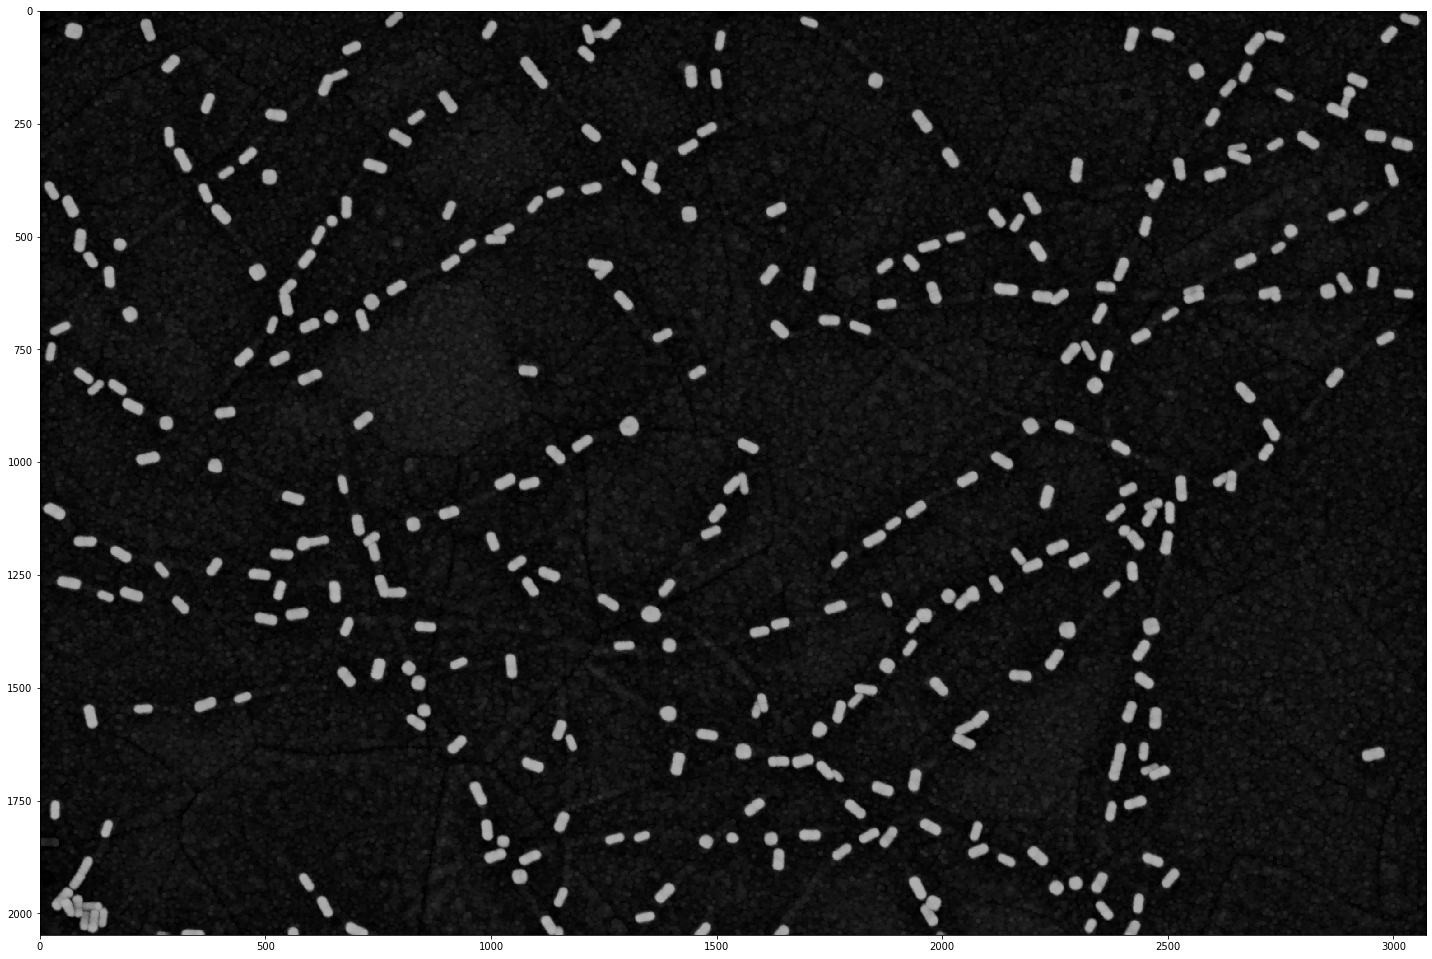

In [125]:
plt.figure(figsize=(20,16))
io.imshow(hull_c)

337


(array([  5.,   3.,  39.,  74., 147.,  45.,   6.,   3.,   9.,   6.]),
 array([ 4. ,  5.7,  7.4,  9.1, 10.8, 12.5, 14.2, 15.9, 17.6, 19.3, 21. ]),
 <a list of 10 Patch objects>)

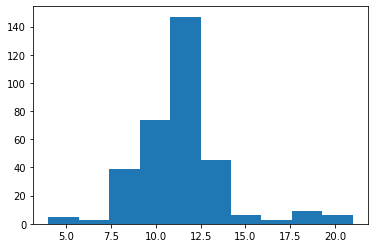

In [26]:
print(len(edge))
plt.hist(edge)

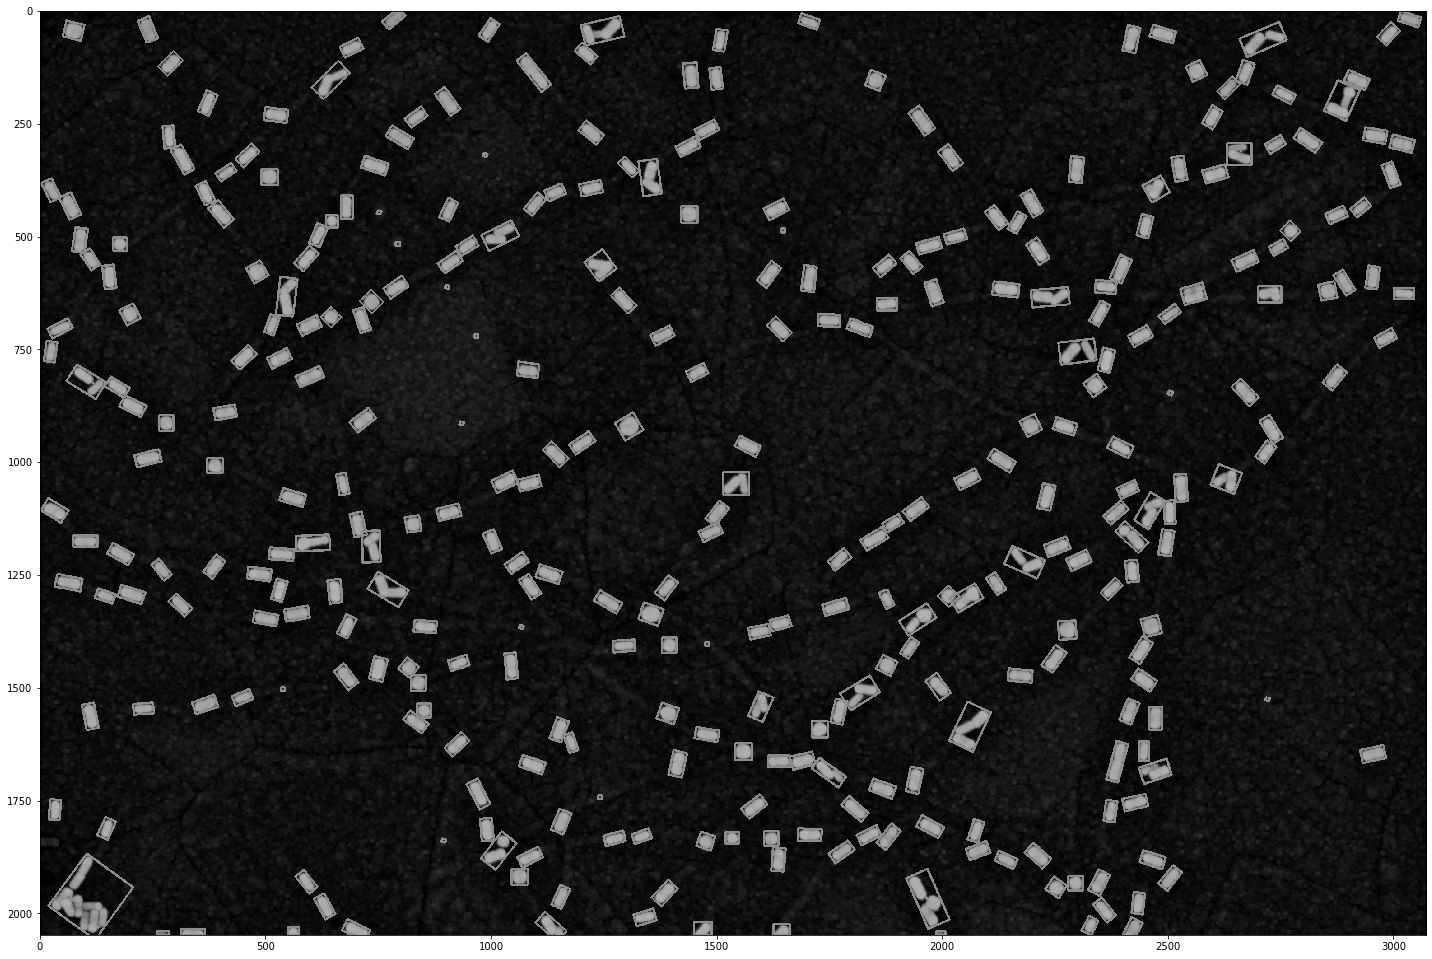

In [127]:
plt.figure(figsize=(20,16))
dilated_c = dilated.copy()
for c in contours:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(dilated_c, [box], 0, (140), 3)
    
    #Question part
    approx = cv2.approxPolyDP(c, 0.5 * cv2.arcLength(c, True), True) #Tunning needed for the coeffecients
    hull = cv2.convexHull(approx)
    cv2.drawContours(dilated_c, hull, -1, (140, 3))
    
io.imshow(dilated_c)

# Below is the official trail

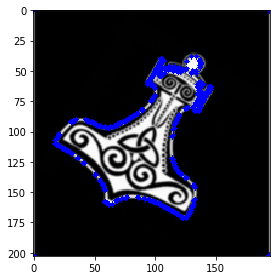

In [87]:
import cv2
import numpy as np

img = cv2.pyrDown(cv2.imread("hammer.png", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY) , 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
# find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    #cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

    # find minimum area
    rect = cv2.minAreaRect(c)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    # normalize coordinates to integers
    box = np.int0(box)
    # draw contours
    #cv2.drawContours(img, [box], 0, (0,0, 255), 3)
    cv2.drawContours(img, c, -1, (0,0, 255), 3)
    '''
    # calculate center and radius of minimum enclosing circle
    (x,y),radius = cv2.minEnclosingCircle(c)
    # cast to integers
    center = (int(x),int(y))
    radius = int(radius)
    # draw the circle
    img = cv2.circle(img,center,radius,(0,255,0),2)
    '''

#cv2.drawContours(img.copy(), contours, -1, (255, 0, 0), 1)
io.imshow(img.copy())